📁 Upload your advanced stats CSV


Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025 (3).csv
✅ Columns loaded:
['PLAYER', 'PER', 'TS%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']


/tmp/ipython-input-5-282309041.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TWO_WAY_EFFICIENCY', y='PLAYER', data=top10_two_way, palette='viridis')


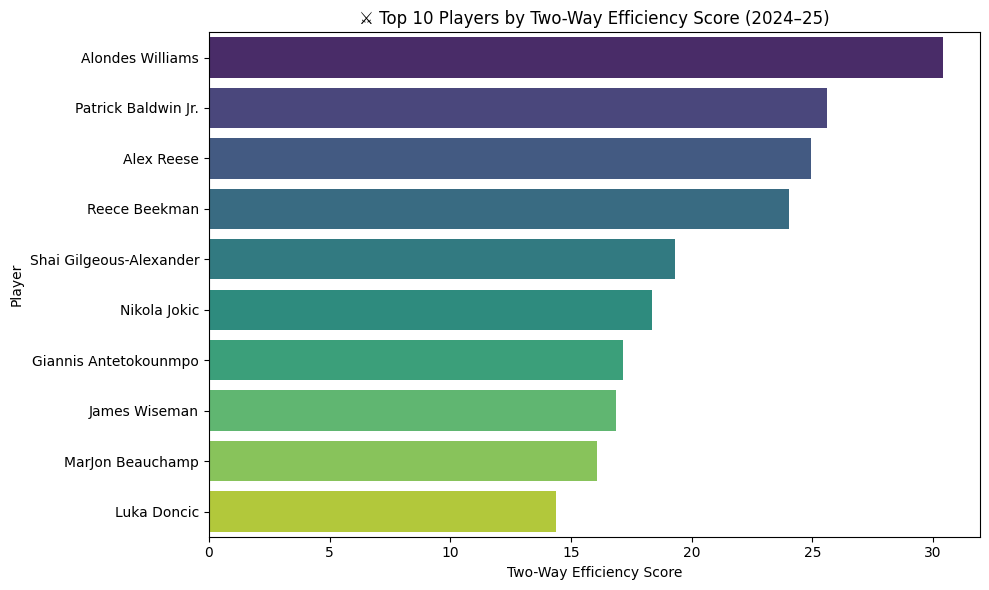

In [5]:
# 📦 Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📁 Step 2: Upload the CSV file
print("📁 Upload your advanced stats CSV")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 📊 Step 3: Load and clean column names
df = pd.read_csv(filename)
df.columns = df.columns.str.strip().str.upper()

# 📌 Step 4: Display available columns
print("✅ Columns loaded:")
print(df.columns.tolist())

# 🧠 Step 5: Compute Two-Way Efficiency Score
df['TWO_WAY_EFFICIENCY'] = (
    df['USG%'] * 0.25 +
    df['WS/48'] * 100 * 0.25 +  # scaled to match other stats
    df['OBPM'] * 0.25 +
    df['DBPM'] * 0.25
)

# 🥇 Step 6: Top 10 Players
top10_two_way = df.sort_values('TWO_WAY_EFFICIENCY', ascending=False).head(10)

# 📊 Step 7: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='TWO_WAY_EFFICIENCY', y='PLAYER', data=top10_two_way, palette='viridis')
plt.title("⚔️ Top 10 Players by Two-Way Efficiency Score (2024–25)")
plt.xlabel("Two-Way Efficiency Score")
plt.ylabel("Player")
plt.tight_layout()
plt.savefig("top10_two_way_efficiency_2024_25.jpg", format='jpg', dpi=300)
plt.show()

# 💾 Step 8: Save results
top10_two_way.to_csv("top10_two_way_efficiency_2024_25.csv", index=False)